# WeatherPy
#Challenge 6

---

##  Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=150)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=150)
#lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
#lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
# Print the list of 10 cities
for city in cities[:10]:
    print(city)

Number of cities in the list: 110
grytviken
lompoc
edinburgh of the seven seas
yuzhno-kurilsk
bohorodchany
tena
tindouf
yellowknife
jamestown
hadibu


In [4]:
# Set the API base URL
OPENWEATHERMAP_URL = "https://api.openweathermap.org/data/2.5/weather"

# Make the API request for the first city in the list
response = requests.get(OPENWEATHERMAP_URL, params={
    "lat": lats[0],
    "lon": lngs[0],
    "appid": weather_api_key  # API key
})

# Check if the request was successful
if response.status_code != 200:
    raise Exception(f"{response.status_code}: {response.reason}, {response.content.decode()}")

# Convert response to JSON
places_data = response.json()

# Print the JSON (pretty printed)
print(json.dumps(places_data, indent=4, sort_keys=True))
    

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": -64.5296,
        "lon": -32.9239
    },
    "dt": 1726284150,
    "id": 0,
    "main": {
        "feels_like": 257.99,
        "grnd_level": 969,
        "humidity": 94,
        "pressure": 969,
        "sea_level": 969,
        "temp": 264.99,
        "temp_max": 264.99,
        "temp_min": 264.99
    },
    "name": "",
    "sys": {
        "sunrise": 1726302392,
        "sunset": 1726343278
    },
    "timezone": -7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 7,
        "gust": 13.13,
        "speed": 6.83
    }
}


In [5]:
# Compose the full URL with API key and lat/lon params
url = f"https://api.openweathermap.org/data/2.5/weather?lat={lats[0]}&lon={lngs[0]}&appid={weather_api_key}"


# Make the API request for the first city in the list
response = requests.get(url)

# Check if the request was successful
if response.status_code != 200:
    raise Exception(f"{response.status_code}: {response.reason}, {response.content.decode()}")

# Convert response to JSON
places_data = response.json()

# Print the JSON (pretty printed)
print(json.dumps(places_data, indent=4, sort_keys=True))
    

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": -64.5296,
        "lon": -32.9239
    },
    "dt": 1726284150,
    "id": 0,
    "main": {
        "feels_like": 257.99,
        "grnd_level": 969,
        "humidity": 94,
        "pressure": 969,
        "sea_level": 969,
        "temp": 264.99,
        "temp_max": 264.99,
        "temp_min": 264.99
    },
    "name": "",
    "sys": {
        "sunrise": 1726302392,
        "sunset": 1726343278
    },
    "timezone": -7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 7,
        "gust": 13.13,
        "speed": 6.83
    }
}


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?lat={lats[i]}&lon={lngs[i]}&appid={weather_api_key}"
 

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)

        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
City not found. Skipping...
Processing Record 2 of Set 1 | lompoc
Processing Record 3 of Set 1 | edinburgh of the seven seas
City not found. Skipping...
Processing Record 4 of Set 1 | yuzhno-kurilsk
City not found. Skipping...
Processing Record 5 of Set 1 | bohorodchany
Processing Record 6 of Set 1 | tena
Processing Record 7 of Set 1 | tindouf
City not found. Skipping...
Processing Record 8 of Set 1 | yellowknife
City not found. Skipping...
Processing Record 9 of Set 1 | jamestown
City not found. Skipping...
Processing Record 10 of Set 1 | hadibu
City not found. Skipping...
Processing Record 11 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 12 of Set 1 | calama
City not found. Skipping...
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | puerto ayora
City not found. Skipping...
Processing Record 15 of Set 1 | isafjordur
City not found. Skip

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          35
Lat           35
Lng           35
Max Temp      35
Humidity      35
Cloudiness    35
Wind Speed    35
Country       35
Date          35
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lompoc,34.5134,-121.2834,288.66,88,100,6.94,US,1726284174
1,bohorodchany,48.7521,24.4929,287.80,96,100,1.53,UA,1726284177
2,tena,-1.3381,-77.4128,298.13,67,32,0.84,EC,1726284178
3,puerto natales,-21.1186,-68.2624,274.18,21,0,2.75,CL,1726284186
4,pathalgaon,5.3281,34.2634,300.18,44,34,2.37,SS,1726284196


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lompoc,34.5134,-121.2834,288.66,88,100,6.94,US,1726284174
1,bohorodchany,48.7521,24.4929,287.80,96,100,1.53,UA,1726284177
2,tena,-1.3381,-77.4128,298.13,67,32,0.84,EC,1726284178
3,puerto natales,-21.1186,-68.2624,274.18,21,0,2.75,CL,1726284186
4,pathalgaon,5.3281,34.2634,300.18,44,34,2.37,SS,1726284196


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

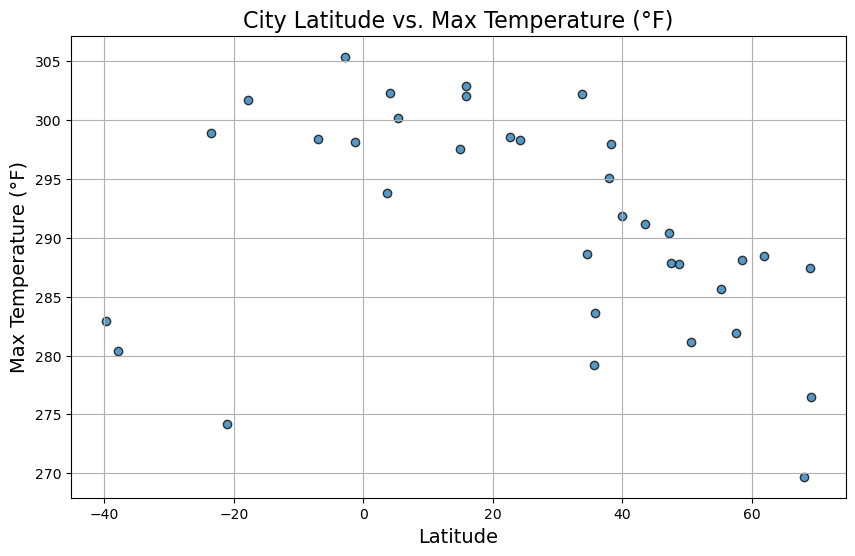

<Figure size 640x480 with 0 Axes>

In [11]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="k", linewidths=1, alpha=0.75)


# Incorporate the other graph properties
# Add labels and title
plt.title("City Latitude vs. Max Temperature (°F)", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Max Temperature (°F)", fontsize=14)

# Show the plot
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

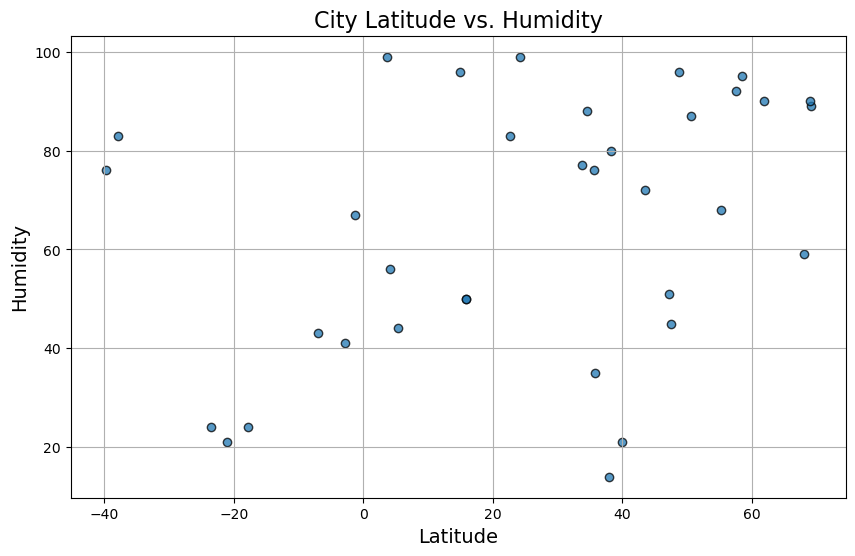

<Figure size 640x480 with 0 Axes>

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="k", linewidths=1, alpha=0.75)

# Incorporate the other graph properties
# Add labels and title
plt.title("City Latitude vs. Humidity", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity", fontsize=14)

# Show the plot
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

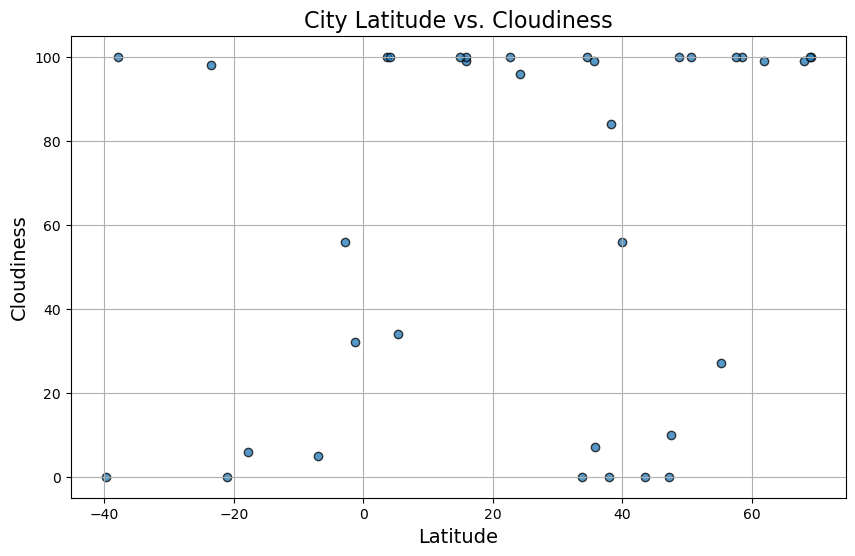

<Figure size 640x480 with 0 Axes>

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="k", linewidths=1, alpha=0.75)

# Incorporate the other graph properties
# Add labels and title
plt.title("City Latitude vs. Cloudiness", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness", fontsize=14)

# Show the plot
plt.grid(True)
plt.show()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

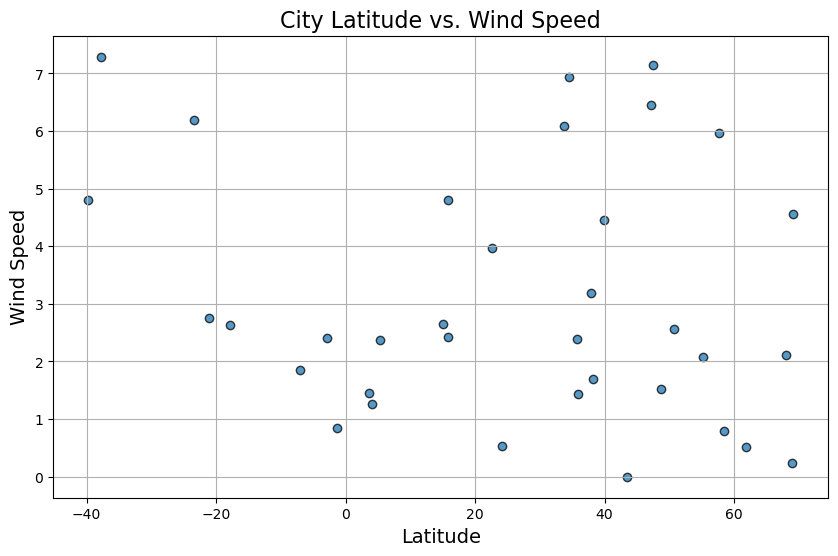

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="k", linewidths=1, alpha=0.75)

# Incorporate the other graph properties
# Add labels and title
plt.title("City Latitude vs. Wind Speed", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed", fontsize=14)

# Show the plot
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


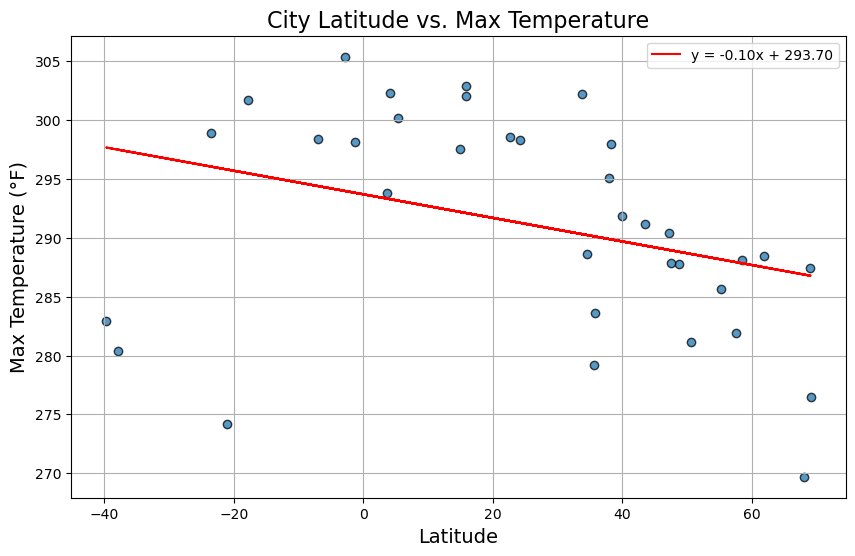

Correlation coefficient between Latitude and Max Temperature: PearsonRResult(statistic=-0.3337958103956661, pvalue=0.050035569571306206)


In [15]:

#Latitude vs Temperature Linear Regression
latitudes = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]

#Perform linear regression:
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, max_temps)
# Calculate the regression line values
regress_values = latitudes * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitudes, max_temps, edgecolors="k", linewidths=1, alpha=0.75)

# Plot the linear regression line
plt.plot(latitudes, regress_values, "r-", label=line_eq)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Max Temperature (°F)", fontsize=14)
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

#Calculate correlation coefficient 
correlation = st.pearsonr(latitudes, max_temps)
print(f"Correlation coefficient between Latitude and Max Temperature: {correlation}")


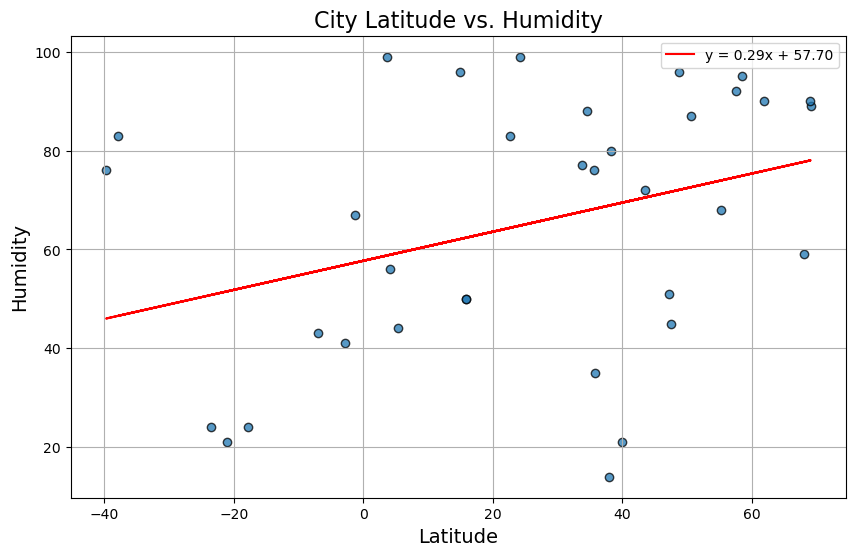

Correlation coefficient between Latitude and Humidity: PearsonRResult(statistic=0.345002789392096, pvalue=0.04238351762636029)


In [16]:
#Latitude vs Temperature Linear Regression
latitudes = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

#Perform linear regression:
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, humidity)
# Calculate the regression line values
regress_values = latitudes * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitudes, humidity, edgecolors="k", linewidths=1, alpha=0.75)

# Plot the linear regression line
plt.plot(latitudes, regress_values, "r-", label=line_eq)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity", fontsize=14)
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

#Calculate correlation coefficient 
correlation = st.pearsonr(latitudes, humidity)
print(f"Correlation coefficient between Latitude and Humidity: {correlation}")

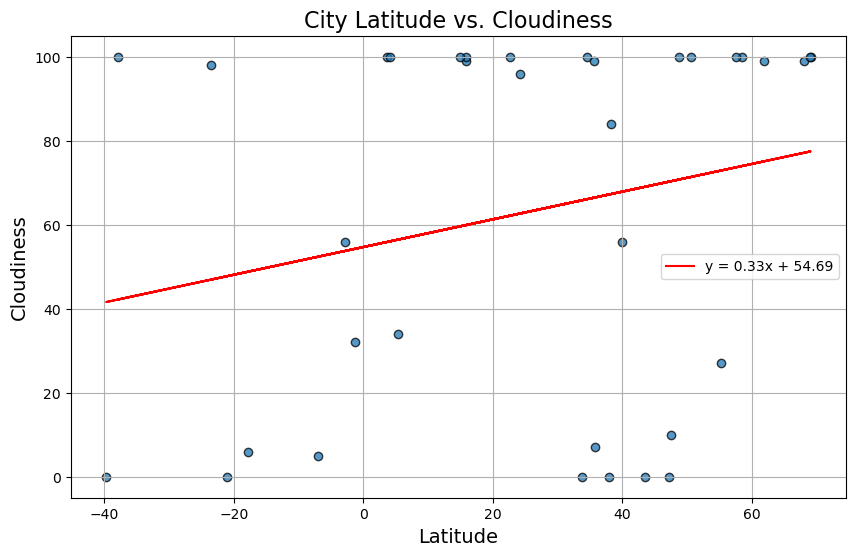

Correlation coefficient between Latitude and Cloudiness: PearsonRResult(statistic=0.23155477434564878, pvalue=0.1807596858024199)


In [17]:
#Latitude Vs Cloudiness Linear Regression
latitudes = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]

#Perform linear regression:
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, cloudiness)
# Calculate the regression line values
regress_values = latitudes * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitudes, cloudiness, edgecolors="k", linewidths=1, alpha=0.75)

# Plot the linear regression line
plt.plot(latitudes, regress_values, "r-", label=line_eq)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness", fontsize=14)
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

#Calculate correlation coefficient 
correlation = st.pearsonr(latitudes, cloudiness)
print(f"Correlation coefficient between Latitude and Cloudiness: {correlation}")

In [ ]:
#Latitude Vs Windspeed Linear Regression
latitudes = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]

#Perform linear regression:
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, wind_speed)
# Calculate the regression line values
regress_values = latitudes * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitudes, wind_speed, edgecolors="k", linewidths=1, alpha=0.75)

# Plot the linear regression line
plt.plot(latitudes, regress_values, "r-", label=line_eq)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed", fontsize=14)
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

#Calculate correlation coefficient 
correlation = st.pearsonr(latitudes, wind_speed)
print(f"Correlation coefficient between Latitude and Wind Speed: {correlation}")

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

# Filter for Northern Hemisphere (latitudes > 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] > 0]

# Display the new DataFrame
northern_hemi_df.head()


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
temperatures = northern_hemi_df["Max Temp"]
latitudes = northern_hemi_df["Lat"]

#Perform linear regression:
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, temperatures)
# Calculate the regression line values
regress_values = latitudes * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitudes, temperatures, edgecolors="k", linewidths=1, alpha=0.75)

# Plot the linear regression line
plt.plot(latitudes, regress_values, "r-", label=line_eq)

# Incorporate the other graph properties
plt.title("Temperature Vs. Latitude Linear Regression", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Temperature (F)", fontsize=14)
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

#Calculate correlation coefficient 
correlation = st.pearsonr(latitudes, temperatures)
print(f"Correlation coefficient between Temperature and Latitude:  {correlation}")

In [ ]:
# Linear regression on Southern Hemisphere
temperatures = southern_hemi_df["Max Temp"]
latitudes = southern_hemi_df["Lat"]

#Perform linear regression:
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, temperatures)
# Calculate the regression line values
regress_values = latitudes * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitudes, temperatures, edgecolors="k", linewidths=1, alpha=0.75)

# Plot the linear regression line
plt.plot(latitudes, regress_values, "r-", label=line_eq)

# Incorporate the other graph properties
plt.title("Temperature Vs. Latitude Linear Regression", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Temperature (F)", fontsize=14)
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

#Calculate correlation coefficient 
correlation = st.pearsonr(latitudes, temperatures)
print(f"Correlation coefficient between Temperature and Latitude:  {correlation}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere Humidity Vs. Laitude Regression
humidity = northern_hemi_df["Max Temp"]
latitudes = northern_hemi_df["Lat"]

#Perform linear regression:
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, humidity)
# Calculate the regression line values
regress_values = latitudes * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitudes, humidity, edgecolors="k", linewidths=1, alpha=0.75)

# Plot the linear regression line
plt.plot(latitudes, regress_values, "r-", label=line_eq)

# Incorporate the other graph properties
plt.title("Humidity Vs. Latitude Linear Regression", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity", fontsize=14)
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

#Calculate correlation coefficient 
correlation = st.pearsonr(latitudes, humidity)
print(f"Correlation coefficient between Humidity and Latitude:  {correlation}")

In [ ]:
# Southern Hemisphere Humidity Vs. Latitude regression
humidity = southern_hemi_df["Max Temp"]
latitudes = southern_hemi_df["Lat"]

#Perform linear regression:
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, humidity)
# Calculate the regression line values
regress_values = latitudes * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitudes, humidity, edgecolors="k", linewidths=1, alpha=0.75)

# Plot the linear regression line
plt.plot(latitudes, regress_values, "r-", label=line_eq)

# Incorporate the other graph properties
plt.title("Humidity Vs. Latitude Linear Regression: Southern Hemisphere", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity", fontsize=14)
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

#Calculate correlation coefficient 
correlation = st.pearsonr(latitudes, humidity)
print(f"Correlation coefficient between Humidity and Latitude:  {correlation}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
cloudiness = northern_hemi_df["Cloudiness"]
latitudes = northern_hemi_df["Lat"]

#Perform linear regression:
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, cloudiness)
# Calculate the regression line values
regress_values = latitudes * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitudes, cloudiness, edgecolors="k", linewidths=1, alpha=0.75)

# Plot the linear regression line
plt.plot(latitudes, regress_values, "r-", label=line_eq)

# Incorporate the other graph properties
plt.title("Cloudiness Vs. Latitude Linear Regression: Northern Hemisphere", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness", fontsize=14)
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

#Calculate correlation coefficient 
correlation = st.pearsonr(latitudes, cloudiness)
print(f"Correlation coefficient between Cloudiness and Latitude Northern Hemishphere:  {correlation}")

In [ ]:
# Southern Hemisphere Linear Regression
cloudiness = southern_hemi_df["Cloudiness"]
latitudes = southern_hemi_df["Lat"]

#Perform linear regression:
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, cloudiness)
# Calculate the regression line values
regress_values = latitudes * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitudes, cloudiness, edgecolors="k", linewidths=1, alpha=0.75)

# Plot the linear regression line
plt.plot(latitudes, regress_values, "r-", label=line_eq)

# Incorporate the other graph properties
plt.title("Cloudiness Vs. Latitude Linear Regression: Southern Hemisphere", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness", fontsize=14)
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

#Calculate correlation coefficient 
correlation = st.pearsonr(latitudes, cloudiness)
print(f"Correlation coefficient between Cloudiness and Latitude Northern Hemishphere:  {correlation}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Wind Speed vs. Latitude Linear Regression: Northern Hemisphere
wind_speed = northern_hemi_df["Wind Speed"]
latitudes = northern_hemi_df["Lat"]

#Perform linear regression:
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, wind_speed)
# Calculate the regression line values
regress_values = latitudes * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitudes, wind_speed, edgecolors="k", linewidths=1, alpha=0.75)

# Plot the linear regression line
plt.plot(latitudes, regress_values, "r-", label=line_eq)

# Incorporate the other graph properties
plt.title("Wind Speed Vs. Latitude Linear Regression: Northern Hemisphere", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed", fontsize=14)
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

#Calculate correlation coefficient 
correlation = st.pearsonr(latitudes, wind_speed)
print(f"Correlation coefficient between Wind Speed and Latitude Northern Hemishphere:  {correlation}")

In [ ]:
# Wind Speed vs. Latitude Linear Regression: Northern Hemisphere: Southern Hemisphere
wind_speed = southern_hemi_df["Wind Speed"]
latitudes = southern_hemi_df["Lat"]

#Perform linear regression:
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, wind_speed)
# Calculate the regression line values
regress_values = latitudes * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitudes, wind_speed, edgecolors="k", linewidths=1, alpha=0.75)

# Plot the linear regression line
plt.plot(latitudes, regress_values, "r-", label=line_eq)

# Incorporate the other graph properties
plt.title("Wind Speed Vs. Latitude Linear Regression: Southern Hemisphere", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed", fontsize=14)
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

#Calculate correlation coefficient 
correlation = st.pearsonr(latitudes, wind_speed)
print(f"Correlation coefficient between Wind Speed and Latitude Southern Hemishphere:  {correlation}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE